<a href="https://colab.research.google.com/github/racheltu2020/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module2/LS_DS16_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 122
## Sampling, Confidence Intervals, and Hypothesis Testing

## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

In [0]:
import numpy as np
from scipy.stats import chisquare  # One-way chi square test

# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation

ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)
print(chisquare(ind_obs, axis=None))

dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print(chisquare(dep_obs, axis=None))

[[1 2]
 [1 2]]
Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)
[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


In [0]:
# Distribution tests:
# We often assume that something is normal, but it can be important to *check*

# For example, later on with predictive modeling, a typical assumption is that
# residuals (prediction errors) are normal - checking is a good diagnostic

from scipy.stats import normaltest
# Poisson models arrival times and is related to the binomial (coinflip)
sample = np.random.poisson(5, 1000)
print(normaltest(sample))  # Pretty clearly not normal

NormaltestResult(statistic=38.69323106073592, pvalue=3.961609200867749e-09)


In [0]:
# Kruskal-Wallis H-test - compare the median rank between 2+ groups
# Can be applied to ranking decisions/outcomes/recommendations
# The underlying math comes from chi-square distribution, and is best for n>5
from scipy.stats import kruskal

x1 = [1, 3, 5, 7, 9]
y1 = [2, 4, 6, 8, 10]
print(kruskal(x1, y1))  # x1 is a little better, but not "significantly" so

x2 = [1, 1, 1]
y2 = [2, 2, 2]
z = [2, 2]  # Hey, a third group, and of different size!
print(kruskal(x2, y2, z))  # x clearly dominates

KruskalResult(statistic=0.2727272727272734, pvalue=0.6015081344405895)
KruskalResult(statistic=7.0, pvalue=0.0301973834223185)


And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

## T-test Assumptions

<https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php>

- Independence of means

Are the means of our voting data independent (do not affect the outcome of one another)?
  
The best way to increase thel likelihood of our means being independent is to randomly sample (which we did not do).


In [0]:
from scipy.stats import ttest_ind

?ttest_ind

- "Homogeneity" of Variance? 

Is the magnitude of the variance between the two roughly the same?

I think we're OK on this one for the voting data, although it probably could be better, one party was larger than the other.

If we suspect this to be a problem then we can use Welch's T-test

In [0]:
?ttest_ind

- "Dependent Variable" (sample means) are Distributed Normally

<https://stats.stackexchange.com/questions/9573/t-test-for-non-normal-when-n50>

Lots of statistical tests depend on normal distributions. We can test for normality using Scipy as was shown above.

This assumption is often assumed even if the assumption is a weak one. If you strongly suspect that things are not normally distributed, you can transform your data to get it looking more normal and then run your test. This problem typically goes away for large sample sizes (yay Central Limit Theorem) and is often why you don't hear it brought up. People declare the assumption to be satisfied either way. 



## Central Limit Theorem



In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sample_means = []
for x in range(0,3000):
  coinflips = np.random.binomial(n=1, p=.5, size=12)
  one_sample = coinflips
  sample_means.append(coinflips.mean())

print(len(sample_means))
print(sample_means)


3000
[0.4166666666666667, 0.4166666666666667, 0.5, 0.5, 0.5, 0.5, 0.4166666666666667, 0.3333333333333333, 0.5, 0.16666666666666666, 0.5833333333333334, 0.6666666666666666, 0.75, 0.5, 0.4166666666666667, 0.5, 0.6666666666666666, 0.25, 0.5833333333333334, 0.5833333333333334, 0.6666666666666666, 0.5833333333333334, 0.4166666666666667, 0.16666666666666666, 0.3333333333333333, 0.5833333333333334, 0.6666666666666666, 0.5833333333333334, 0.3333333333333333, 0.5833333333333334, 0.5, 0.5833333333333334, 0.5833333333333334, 0.5, 0.16666666666666666, 0.75, 0.4166666666666667, 0.5, 0.6666666666666666, 0.5833333333333334, 0.5, 0.3333333333333333, 0.75, 0.16666666666666666, 0.5, 0.4166666666666667, 0.5833333333333334, 0.3333333333333333, 0.4166666666666667, 0.5833333333333334, 0.5833333333333334, 0.4166666666666667, 0.5, 0.0, 0.5833333333333334, 0.5, 0.5, 0.75, 0.5833333333333334, 0.4166666666666667, 0.4166666666666667, 0.5833333333333334, 0.5, 0.3333333333333333, 0.5, 0.5, 0.6666666666666666, 0.416

In [12]:
df = pd.DataFrame({'single_sample': one_sample})
df.head()


array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0])

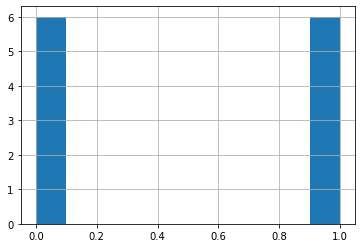

In [14]:
df.single_sample.hist();

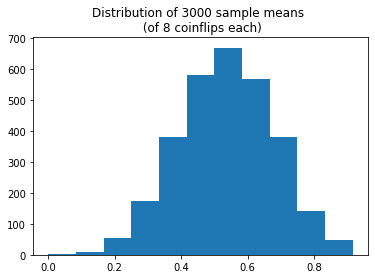

In [18]:
ax = plt.hist(sample_means, bins=11)
plt.title('Distribution of 3000 sample means \n (of 8 coinflips each)');

In [0]:
coinflips = np.random.binomial(n=1, p=.5, size=120)

coinflips.mean()

0.49166666666666664

What does the Central Limit Theorem State? That no matter the initial distribution of the population, the distribution of sample means taken will approximate a normal distribution as $n \rightarrow \infty$.

This has very important implications for hypothesis testing and is precisely the reason why the t-distribution begins to approximate the normal distribution as our sample size increases. 

In [19]:
sample_means_small = []
sample_means_large = []
for x in range(0,3000):
  coinflips_small = np.random.binomial(n=1, p=.5, size=20)
  coinflips_large = np.random.binomial(n=1, p=.5, size=100)
  one_small_sample = coinflips_small
  one_small_large = coinflips_large
  sample_means_small.append(coinflips_small.mean())
  sample_means_large.append(coinflips_large.mean())

print(len(sample_means_small))
print(sample_means_small)
plt

3000
[0.55, 0.5, 0.3, 0.45, 0.5, 0.5, 0.55, 0.6, 0.55, 0.2, 0.45, 0.55, 0.5, 0.45, 0.55, 0.5, 0.4, 0.55, 0.45, 0.5, 0.3, 0.35, 0.4, 0.55, 0.45, 0.5, 0.5, 0.55, 0.45, 0.5, 0.55, 0.35, 0.4, 0.45, 0.5, 0.3, 0.55, 0.75, 0.4, 0.5, 0.55, 0.35, 0.45, 0.45, 0.6, 0.35, 0.5, 0.45, 0.55, 0.55, 0.6, 0.35, 0.6, 0.45, 0.35, 0.55, 0.55, 0.4, 0.4, 0.45, 0.55, 0.5, 0.65, 0.55, 0.7, 0.65, 0.5, 0.6, 0.5, 0.4, 0.55, 0.6, 0.65, 0.55, 0.4, 0.35, 0.55, 0.45, 0.45, 0.6, 0.6, 0.55, 0.45, 0.45, 0.55, 0.6, 0.5, 0.6, 0.4, 0.55, 0.4, 0.65, 0.45, 0.5, 0.7, 0.55, 0.6, 0.55, 0.6, 0.4, 0.65, 0.4, 0.65, 0.5, 0.4, 0.6, 0.55, 0.5, 0.5, 0.7, 0.65, 0.55, 0.55, 0.6, 0.5, 0.55, 0.6, 0.5, 0.35, 0.45, 0.5, 0.35, 0.55, 0.5, 0.3, 0.5, 0.7, 0.6, 0.55, 0.55, 0.55, 0.75, 0.45, 0.45, 0.4, 0.6, 0.4, 0.5, 0.55, 0.5, 0.55, 0.45, 0.6, 0.4, 0.45, 0.65, 0.5, 0.35, 0.65, 0.55, 0.6, 0.4, 0.55, 0.45, 0.6, 0.5, 0.55, 0.45, 0.5, 0.55, 0.4, 0.5, 0.5, 0.5, 0.55, 0.55, 0.45, 0.4, 0.5, 0.6, 0.4, 0.5, 0.5, 0.5, 0.35, 0.5, 0.35, 0.4, 0.35, 0.4, 0.65

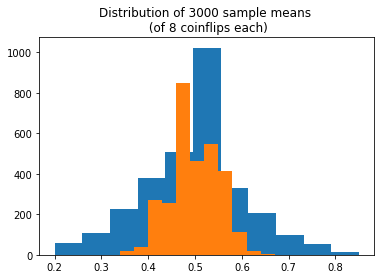

In [22]:
ax1 = plt.hist(sample_means_small, bins=11)
ax2 = plt.hist(sample_means_large, bins=11)
plt.title('Distribution of 3000 sample means \n (of 8 coinflips each)');

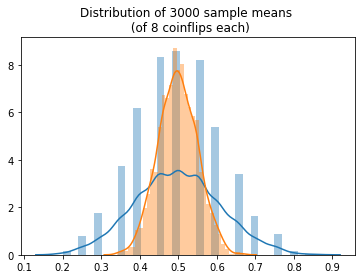

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
fix, ax = plt.subplots()
for sample in [sample_means_small, sample_means_large]:
  sns.distplot(sample)
  
plt.title('Distribution of 3000 sample means \n (of 8 coinflips each)');
plt.legend()

## Standard Error of the Mean

SE of the mean is... the standard deviation of this imaginary distribution of sample means (like the ones we're creating above)

## Build and Interpret a Confidence Interval

<img src="https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/Confidence_Interval.png?raw=true" width=400>

In [0]:
coinflips = np.random.binomial(n=1, p=.5, size=50)
coinflips

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1])

In [0]:
np.mean(coinflips)

0.58

In [0]:
# NumPy by default, calculates what's called the "Population standard deviation"

sigma = np.std(coinflips)

sigma

0.4935585071701226

In [0]:
# We want the SAMPLE standard deviation

s = np.std(coinflips, ddof=1)

s

0.4985693819032899

In [0]:
x_bar = sample mean

mu = population mean

SyntaxError: ignored

In [0]:
confidence_level = .95

(1 + confidence_level) / 2

0.975

<img src="https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/Confidence_Interval.png?raw=true" width=400>

In [0]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  x_bar = np.mean(data)
  n = len(data)
  s = np.std(data, ddof=1)
  std_err = s / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t*std_err
  lower_bound = x_bar - margin_of_error
  upper_bound = x_bar + margin_of_error
  return (lower_bound, x_bar, upper_bound)

In [0]:
###### copy from stack overflow
###### function as def confidence_interval(data, confidence=0.95):
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chisquare  # One-way chi square test
from scipy.stats import t, ttest_1samp
from scipy import stats 

coinflips = np.random.binomial(n=1, p=.5, size=50)
confidence_interval(coinflips)

(0.3365737906626731, 0.48, 0.6234262093373268)

## Graphically Represent a Confidence Interval

In [36]:
df = pd.DataFrame({'coinflips': coinflips})

df.head()

,coinflips
0,1
1,1
2,1
3,0
4,0


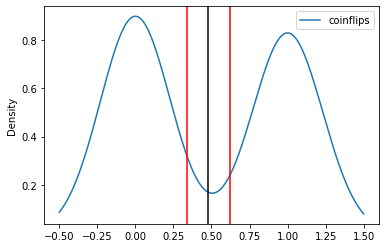

In [37]:
# The confidence interval does NOT capture 95% of the data in our sample

lower, mean, upper = confidence_interval(coinflips)

df.plot.density()
plt.axvline(x=lower, color='red')
plt.axvline(x=mean, color='black')
plt.axvline(x=upper, color='red')
plt.show()

In [38]:
lower, mean, upper = confidence_interval(coinflips)
moe = upper - mean
moe

0.14342620933732686

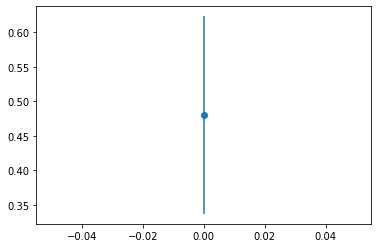

In [47]:
plt.errorbar(0, mean, yerr=moe, fmt='o')
plt.show()

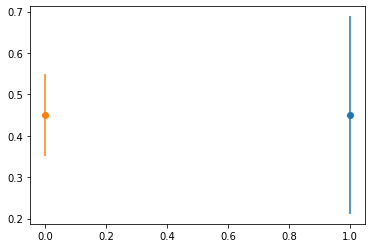

In [0]:
## comparing multiple confidence intervals
coinflips1 = np.random.binomial(n=1, p=.5, size=100)
coinflips2 = np.random.binomial(n=1, p=.5, size=20)

lower1, mean1, upper1 = confidence_interval(coinflips1)
lower2, mean2, upper2 = confidence_interval(coinflips2)

moe1 = upper1 - mean1
moe2 = upper2 - mean2

plt.errorbar(1, mean2, yerr=moe2, fmt='o')
plt.errorbar(0, mean1, yerr=moe1, fmt='o')
plt.show()


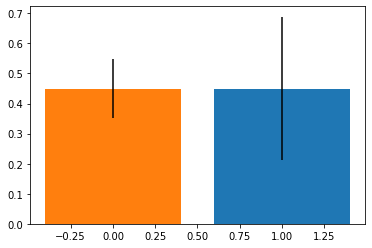

In [0]:
plt.bar(1, mean2, yerr=moe2)
plt.bar(0, mean1, yerr=moe1)
plt.show()

## Relationship between Confidence Intervals and T-tests

Confidence Interval == Bounds of statistical significance for our t-test

A sample mean that falls inside of our confidence interval will "FAIL TO REJECT" our null hypothesis

A sample mean that falls outside of our confidence interval will "REJECT" our null hypothesis

In [0]:
from scipy.stats import t, ttest_1samp

In [0]:
import numpy as np

coinflip_means = []
for x in range(0,100):
  coinflips = np.random.binomial(n=1, p=.5, size=30)
  coinflip_means.append(coinflips.mean())

print(coinflip_means)

[0.7333333333333333, 0.43333333333333335, 0.5, 0.43333333333333335, 0.5, 0.5, 0.5333333333333333, 0.5, 0.4, 0.43333333333333335, 0.3333333333333333, 0.5333333333333333, 0.5333333333333333, 0.4666666666666667, 0.5, 0.6, 0.6333333333333333, 0.5, 0.3333333333333333, 0.43333333333333335, 0.4666666666666667, 0.43333333333333335, 0.4666666666666667, 0.5333333333333333, 0.43333333333333335, 0.7, 0.7, 0.5333333333333333, 0.5, 0.6666666666666666, 0.43333333333333335, 0.43333333333333335, 0.4, 0.5666666666666667, 0.5333333333333333, 0.6333333333333333, 0.4666666666666667, 0.5333333333333333, 0.36666666666666664, 0.4666666666666667, 0.4, 0.6333333333333333, 0.5666666666666667, 0.5666666666666667, 0.7333333333333333, 0.4, 0.4666666666666667, 0.6, 0.5333333333333333, 0.6333333333333333, 0.4666666666666667, 0.5333333333333333, 0.43333333333333335, 0.5, 0.36666666666666664, 0.4, 0.5666666666666667, 0.5, 0.36666666666666664, 0.5666666666666667, 0.7, 0.43333333333333335, 0.36666666666666664, 0.56666666

In [0]:
# Sample Size
n = len(coinflip_means)
# Degrees of Freedom
dof = n-1
# The Mean of Means:
mean = np.mean(coinflip_means)
# Sample Standard Deviation
sample_std = np.std(coinflip_means, ddof=1)
# Standard Error
std_err = sample_std/n**.5

CI = t.interval(.95, dof, loc=mean, scale=std_err)
print("95% Confidence Interval: ", CI)

95% Confidence Interval:  (0.48189276007256693, 0.5181072399274331)


In [0]:
'''You can roll your own CI calculation pretty easily. 
The only thing that's a little bit challenging 
is understanding the t stat lookup'''

# 95% confidence interval
t_stat = t.ppf(.975, dof)
print("t Statistic:", t_stat)

CI = (mean-(t_stat*std_err), mean+(t_stat*std_err))
print("Confidence Interval", CI)

t Statistic: 1.9842169515086827
Confidence Interval (0.48189276007256693, 0.5181072399274331)


A null hypothesis that's just inside of our confidence interval == fail to reject



In [0]:
ttest_1samp(coinflip_means, .49)

Ttest_1sampResult(statistic=1.0958141381351718, pvalue=0.2758187277462794)

A null hypothesis that's just outside of our confidence interval == reject



In [0]:
ttest_1samp(coinflip_means, .4818927)

Ttest_1sampResult(statistic=1.9842235343454973, pvalue=0.04999925456754134)

## Chi^2 test for goodness of fit

(This will not be on the Sprint Challenge!)

| Roll:     |  1  |  2  |  3  |  4  |  5  |  6  |
|-----------|-----|-----|-----|-----|-----|-----|
| Observed: |  27 | 13  |  10 | 15  | 30  |  32 |
| Expected: |  21.16 | 21.16  | 21.16  |  21.16 | 21.16  | 21.16  |


Being able to do chi^2 tests with only only 1 categorical variable is **NOT** an objective of this sprint. I'm merely starting simple to introduce the concept. You will need to know the version of the chi^2 test that compares two categorical variables (test for independence).


Chi^2 tests measure the degree to which observed frequencies match expected frequencies across many categories. 

An expected frequency is:

\begin{align}
\frac{\text{total observations}}{\text{# categories}}
\end{align}

In [0]:
import numpy as np
# np.something(my_array)

# df.something()

# df['column_header'].something()

die_rolls = np.array([27, 13, 10, 15, 30, 32])

expected_frequency = die_rolls.sum()/len(die_rolls)

expected_frequency

21.166666666666668

1) Null Hypothesis:

We are using a fair die. Observed probabilities are equal to the Expected probabilities

2) Alternative Hypothesis:

We are using an unfair die. Observed probabilities are not equal to the Expected probabilities

3) Confidence Level: 95%


### Calculate our chi^2 statistic:

\begin{align}
\chi^2 = \sum \frac{(observed_i-expected_i)^2}{(expected_i)}
\end{align}


| Roll:     |  1  |  2  |  3  |  4  |  5  |  6  |
|-----------|-----|-----|-----|-----|-----|-----|
| Observed: |  20 | 20  |  20 | 20  | 20  |  100 |
| Expected: |  21.16 | 21.16  | 21.16  |  21.16 | 21.16  | 21.16  |

In [0]:
## Calculate our chi^2 statistic

observed = die_rolls

observed

array([27, 13, 10, 15, 30, 32])

In [0]:
expected = np.array([21.16,21.16,21.16,21.16,21.16,21.16])

expected

array([21.16, 21.16, 21.16, 21.16, 21.16, 21.16])

In [0]:
## chi^2 -> p-value

(observed - expected)

array([  5.84,  -8.16, -11.16,  -6.16,   8.84,  10.84])

In [0]:
(observed - expected)**2

array([ 34.1056,  66.5856, 124.5456,  37.9456,  78.1456, 117.5056])

In [0]:
(observed - expected)**2 / expected

array([1.61179584, 3.14676749, 5.88589792, 1.79327032, 3.69308129,
       5.55319471])

In [0]:
chi2 = ((observed - expected)**2 / expected).sum()

chi2

21.684007561436673

### Python lists vs NumPy Arrays

In [0]:
a = [1,2,3,4,5]
b = [2,3,4,5,6]

a+b

[1, 2, 3, 4, 5, 2, 3, 4, 5, 6]

In [0]:
a - b

TypeError: ignored

In [0]:
a**2

TypeError: ignored

### Array Broadcasting (doing operations item by item in a numpy array)

In [0]:
a = np.array([1,2,3,4,5])
b = np.array([2,3,4,5,6])

a + b

array([ 3,  5,  7,  9, 11])

In [0]:
a - b 

array([-1, -1, -1, -1, -1])

In [0]:
a**2

array([ 1,  4,  9, 16, 25])

p-value: .0006

Conclusion: 

Based on a chi^2 statistic of 21.68, and a p-value of .0006, I (**reject** / fail to reject) the null hypothesis that expected frequencies match the distribution of observed frequencies (fair die) , and suggest the alternative that this is not a fair die because the distribution of expected frequencies does not fit the distribution of observed frequencies.

## Chi^2 test for independence (2-sample version)

In [0]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [0]:
df.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [0]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [0]:
21790 / len(df)

0.6692054912318418

## Run a $\chi^{2}$ Test "by hand" (Using Numpy)

Test if Numbers of years of education that a person has received, is that related to a person's sex/gender?

If they're not related, we say that the variables are "independent".


When we're doing a chi^2 test, this crosstab gets a special name, it's called a "contingency table" -> specifically the one without the margins, (the first one).

In [0]:
observed = pd.crosstab(df['sex'], df['education-num'])

observed

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
sex,,,,,,,,,,,,,,,,
Female,16,46,84,160,144,295,432,144,3390,2806,500,421,1619,536,92,86
Male,35,122,249,486,370,638,743,289,7111,4485,882,646,3736,1187,484,327


In [0]:
observed_margins = pd.crosstab(df['sex'], df['education-num'], margins=True)

observed_margins

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,All
sex,,,,,,,,,,,,,,,,,
Female,16,46,84,160,144,295,432,144,3390,2806,500,421,1619,536,92,86,10771
Male,35,122,249,486,370,638,743,289,7111,4485,882,646,3736,1187,484,327,21790
All,51,168,333,646,514,933,1175,433,10501,7291,1382,1067,5355,1723,576,413,32561


In [0]:
# expected value for female with 1 year of education

10771*51 / 32561

16.87051994717607

In [0]:
# expected value for female with 15 year of education

10771*576 / 32561

190.53763705045913

\begin{align}
expected_{i,j} =\frac{(row_{i} \text{total})(column_{j} \text{total}) }{(\text{total observations})}  
\end{align}

In [0]:
# grab the row sums from the crosstab
row_sums = observed_margins.iloc[0:2, 16:].values
row_sums = row_sums.T[0]

row_sums

array([10771, 21790])

In [0]:
# grab the column sums from the crosstab
col_sums = observed_margins.iloc[2:, 0:16].values
col_sums = col_sums[0]

col_sums

array([   51,   168,   333,   646,   514,   933,  1175,   433, 10501,
        7291,  1382,  1067,  5355,  1723,   576,   413])

In [0]:
total_total = df.shape[0]

total_total

32561

In [0]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total_total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)  
print(expected)

(2, 16)
[[  16.87051995   55.57347747  110.15457142  213.69325266  170.02837751
   308.63127668  388.6835478   143.2340223  3473.67313657 2411.82276343
   457.15801112  352.95774086 1771.40459445  569.95893861  190.53763705
   136.61813212]
 [  34.12948005  112.42652253  222.84542858  432.30674734  343.97162249
   624.36872332  786.3164522   289.7659777  7027.32686343 4879.17723657
   924.84198888  714.04225914 3583.59540555 1153.04106139  385.46236295
   276.38186788]]


In [0]:
chi2 = ((observed - expected)**2 / expected).sum().sum()

chi2

297.7150037250369

### Degrees of freedom in the 2-variable version:

1 variable chi^2 test (goodness of fit): Number of categories - 1

2 variable chi^2 test (for independence):

(number of rows of contingency -1)*(number of columns of contingency-1) = degrees of freedom

dof = (2-1)(16-1) = (1)(15) = 15

## Run a $\chi^{2}$ Test using Scipy

1) Null Hypothesis:

The two variables are independent

2) Alternative:

The two variables are dependent (associated)

3) Confidence Level: 95%

In [0]:
from scipy import stats

# pass in our observed value table (contingency table)
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

print(" chi2 statistic", chi2)
print("\n p-value", p_value)
print("\n degrees of freedom",dof)
print("\n expected frequencies table: \n", expected)

(297.7150037250368,
 1.6677784409205546e-54,
 15,
 array([[  16.87051995,   55.57347747,  110.15457142,  213.69325266,
          170.02837751,  308.63127668,  388.6835478 ,  143.2340223 ,
         3473.67313657, 2411.82276343,  457.15801112,  352.95774086,
         1771.40459445,  569.95893861,  190.53763705,  136.61813212],
        [  34.12948005,  112.42652253,  222.84542858,  432.30674734,
          343.97162249,  624.36872332,  786.3164522 ,  289.7659777 ,
         7027.32686343, 4879.17723657,  924.84198888,  714.04225914,
         3583.59540555, 1153.04106139,  385.46236295,  276.38186788]]))

Conclusion: Due to a chi2 value of 297.7, and a p-value of 0. We reject the null hypothesis that sex and number of years of education obtained are independent, and suggest the alternative, that they are strongly associated. 